# ECBM 4040 Fall '21 Project  - BIOM Group

# Hyperparameter Tuning: NeuroSEED Linear Model (with gradient clipping)

## Initialization

In [1]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model

!pip3 install keras-tuner
import keras_tuner


In [2]:
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [3]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

In [13]:
# set static parameters
MODEL_CHOICE = 'LINEAR'
DEFAULT_BATCH_SIZE = 1024
NUM_EPOCHS = 5
TRAIN_DAT_LIM = np.nan

# set tuning parameters to search over
LR_SELECTIONS = [1e-2, 1e-3, 1e-4]
DROPOUT_SELECTIONS = [0.3, 0.5, 0.7]
ACTIVATION_SELECTIONS = ['relu','relu','tanh']
NUM_UNITS_SELECTIONS = [128, 256, 512] # NOTE: Not used for linear model
NUM_FILTERS_SELECTIONS = [2,3,4] # NOTE: Not used for linear model
#raise('PLACEHOLDER FOR BATCH SIZE')


In [5]:
# set paths
dist_res_path = "results/{0}_clipgrad/".format(MODEL_CHOICE.lower())
os.mkdir(dist_res_path)
hyp_tuner_project_name="random_search_hyp_{0}_clipgrad".format(MODEL_CHOICE.lower())
euc_tuner_project_name="random_search_euc_{0}_clipgrad".format(MODEL_CHOICE.lower())

## Get Qiita Data

In [6]:
cwd = os.getcwd()
if not os.path.exists(f"{cwd}/data/qiita/qiita_numpy.pkl"):
    !wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
    shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

## Load Qiita Dataset

In [7]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))
print('X_train sample:\n{0}'.format(X_train))
dat_lim = TRAIN_DAT_LIM if not np.isnan(TRAIN_DAT_LIM) else len(X_train)
data = ((X_train[:dat_lim], X_test[:dat_lim], X_val[:dat_lim]), (y_train[:dat_lim,:dat_lim], y_test[:dat_lim], y_val[:dat_lim,:dat_lim]))

X_train sample:
[[2 0 1 ... 1 0 3]
 [2 0 3 ... 0 3 0]
 [1 1 3 ... 3 3 1]
 ...
 [2 0 3 ... 3 0 0]
 [2 0 3 ... 0 3 0]
 [0 0 1 ... 2 0 1]]


## Distance Function Hyperparam Tuning 

In [ ]:
embedding = get_embedding_model(model_choice=MODEL_CHOICE)
embedding.summary()

In [ ]:
model_EUCLIDEAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['EUCLIDEAN'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_EUCLIDEAN = {'score': score, 'history': history.history, 'model':model_EUCLIDEAN}
file_to_write = open( dist_res_path + "dist_func_tunning_EUCLIDEAN.pkl", "wb" )
pickle.dump(dist_func_tunning_EUCLIDEAN, file_to_write)

model_HYPERBOLIC, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['HYPERBOLIC'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_HYPERBOLIC = {'score': score, 'history': history.history, 'model':model_HYPERBOLIC}
file_to_write = open( dist_res_path + "dist_func_tunning_HYPERBOLIC.pkl", "wb" )
pickle.dump(dist_func_tunning_HYPERBOLIC, file_to_write)

model_MANHATTAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['MANHATTAN'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_MANHATTAN = {'score': score, 'history': history.history, 'model':model_MANHATTAN}
file_to_write = open( dist_res_path + "dist_func_tunning_MANHATTAN.pkl", "wb" )
pickle.dump(dist_func_tunning_MANHATTAN, file_to_write)

model_SQUARE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['SQUARE'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_SQUARE = {'score': score, 'history': history.history, 'model':model_SQUARE}
file_to_write = open( dist_res_path + "dist_func_tunning_SQUARE.pkl", "wb" )
pickle.dump(dist_func_tunning_SQUARE, file_to_write)

model_COSINE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['COSINE'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_COSINE = {'score': score, 'history': history.history, 'model':model_COSINE}
file_to_write = open( dist_res_path + "dist_func_tunning_COSINE.pkl", "wb" )
pickle.dump(dist_func_tunning_COSINE, file_to_write)



## Visualize Dist_Func_Tunning 

In [8]:
objects = {}
dist_res_path = "results/linear/"
for key in DISTANCE_METRICS.keys():
    file = f'{dist_res_path}dist_func_tunning_{key}.pkl'
    with (open(file, "rb")) as openfile:
        objects[key] = pickle.load(openfile)

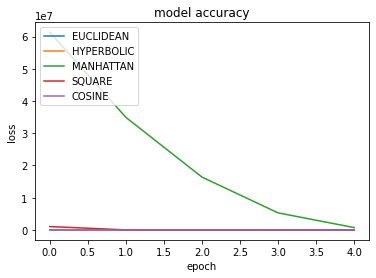

In [9]:
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

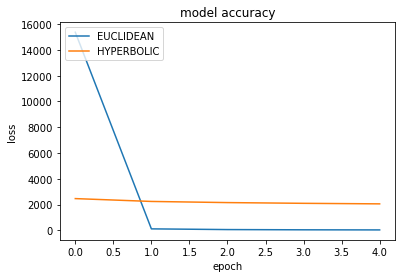

In [10]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

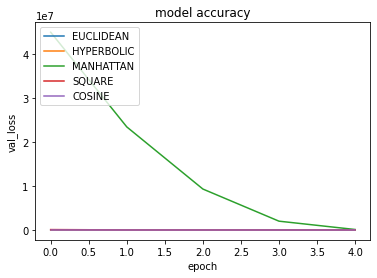

In [11]:
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['val_loss'])
plt.title('model accuracy')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

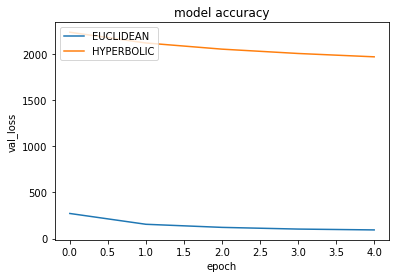

In [12]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['val_loss'])
plt.title('model accuracy')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

# HyperParam Tunning with RandomSearchCV

In [ ]:
from model.layer import DistanceLayer
from model.models_cstm import SiameseModel
from model.generator import SequenceDistDataGenerator

def model_builder_hyp(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    hp_act_func = hp.Choice('act_func', values=ACTIVATION_SELECTIONS)
    hp_dropout = hp.Choice('dropout', values=DROPOUT_SELECTIONS)
#     hp_num_units = hp.Choice('mlp_num_units_hidden', values=NUM_UNITS_SELECTIONS)
#     hp_num_filters = hp.Choice('cnn_num_filters', values=NUM_FILTERS_SELECTIONS)
    
    embedding_model = get_embedding_model(model_choice=MODEL_CHOICE, act_func=hp_act_func, dropout=hp_dropout)
    
    distance = DistanceLayer(metric=DISTANCE_METRICS['HYPERBOLIC'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )

    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    hp_learning_rate = hp.Choice('learning_rate', values=LR_SELECTIONS)
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate, clipnorm=1)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

def model_builder_euc(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    hp_act_func = hp.Choice('act_func', values=ACTIVATION_SELECTIONS)
    hp_dropout = hp.Choice('dropout', values=DROPOUT_SELECTIONS)
#     hp_num_units = hp.Choice('mlp_num_units_hidden', values=NUM_UNITS_SELECTIONS)
#     hp_num_filters = hp.Choice('cnn_num_filters', values=NUM_FILTERS_SELECTIONS)
    
    eembedding_model = get_embedding_model(model_choice=MODEL_CHOICE, act_func=hp_act_func, dropout=hp_dropout)
    
    distance = DistanceLayer(metric=DISTANCE_METRICS['EUCLIDEAN'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )

    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    hp_learning_rate = hp.Choice('learning_rate', values=LR_SELECTIONS)
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate, clipnorm=1)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

class MyTuner(keras_tuner.tuners.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial` 256, 512, 1024
        kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', values = [256, ,512, 1024])
        kwargs['epochs'] = NUM_EPOCHS

        X_val, y_val = kwargs['validation_data']
        training_generator = SequenceDistDataGenerator( X_train, y_train, batch_size = kwargs['batch_size'] )
        kwargs['validation_data'] = SequenceDistDataGenerator( X_val, y_val, batch_size = kwargs['batch_size'])
        
        return super(MyTuner, self).run_trial(trial, training_generator, **kwargs)

## RandomSearchCV Hyperparam Tuning (w/ Hyperbolic)

In [ ]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_hyp, objective='val_loss' , directory='hyper_param_tunning',
                     project_name=hyp_tuner_project_name, max_trials=10)

# Don't pass epochs or batch_size here, let the Tuner tune them.
tuner.search(X_train, y_train,  validation_data=(X_val,y_val),
             callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

In [ ]:
# Get the optimal hyperparameters
best_hps_HYPERBOLIC=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_HYPERBOLIC
file_to_write = open( dist_rest_path + "best_hyps_HYPERBOLIC.pkl", "wb")
pickle.dump(best_hps_HYPERBOLIC, file_to_write)

## RandomSearchCV Hyperparam Tuning (w/ Euclidean)

In [ ]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_euc, objective='val_loss' directory='hyper_param_tunning',
                     project_name=euc_tuner_project_name,  max_trials=10)

training_generator = SequenceDistDataGenerator( X_train, y_train )
validation_generator = SequenceDistDataGenerator( X_val, y_val)

# Don't pass epochs or batch_size here, let the Tuner tune them.
tuner.search(training_generator, validation_data=validation_generator,
            max_trials=5, callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)] )

In [ ]:
# Get the optimal hyperparameters
best_hps_EUCLIDEAN=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_EUCLIDEAN
file_to_write = open( dist_res_path + "best_hyps_EUCLIDEAN.pkl", "wb")
pickle.dump(best_hps_EUCLIDEAN, file_to_write)